t=1 1
t=1 2
t=1 3
t=1 4
t=1 5
t=1 6
t=1 7
t=1 8
t=1 9
t=1 10
t=1 11
t=1 12
t=1 13
t=1 14
t=1 15
t=1 16
t=1 17
t=1 18
t=1 19
t=1 20
t=1 21
t=1 22
t=1 23
t=1 24
t=1 25
t=1 26
t=1 27
t=1 28
t=1 29
t=1 30
t=1 31
t=1 32
t=1 33
t=1 34
t=1 35
t=1 36
t=1 37
t=1 38
t=1 39
t=1 40
t=1 41
t=1 42
t=1 43
t=1 44
t=1 45
t=1 46
t=1 47
t=1 48
t=1 49
t=1 50
t=1 51
t=1 52
t=1 53
t=1 54
t=1 55
t=1 56
t=1 57
t=1 58
t=1 59
t=1 60
t=1 61
t=1 62
t=1 63
t=1 64
t=1 65
t=1 66
t=1 67
t=1 68
t=1 69
t=1 70
t=1 71
t=1 72
t=1 73
t=1 74
t=1 75
t=1 76
t=1 77
t=1 78
t=1 79
t=1 80
t=1 81
t=1 82
t=1 83
t=1 84
t=1 85
t=1 86
t=1 87
t=1 88
t=1 89
t=1 90
t=1 91
t=1 92
t=1 93
t=1 94
t=1 95
t=1 96
t=1 97
t=1 98
t=1 99
t=1 100
t=1 101
t=1 102
t=1 103
t=1 104
t=1 105
t=1 106
t=1 107
t=1 108
t=1 109
t=1 110
t=1 111
t=1 112
t=1 113
t=1 114
t=1 115
t=1 116
t=1 117
t=1 118
t=1 119
t=1 120
t=1 121
t=1 122
t=1 123
t=1 124
t=1 125
t=1 126
t=1 127
t=1 128
t=1 129
t=1 130
t=1 131
t=1 132
t=1 133
t=1 134
t=1 135
t=1 136
t=1 137
t=1 138
t=1 

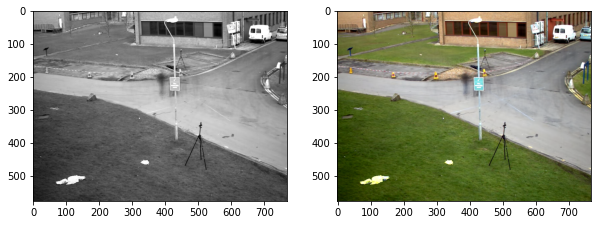

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap=cv2.VideoCapture('./data/vtest.avi')
if (not cap.isOpened()):
    print('Error opening video')

height,width=(int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
              int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

acc_gray=np.zeros(shape=(height,width),dtype=np.float32)
acc_bgr=np.zeros(shape=(height,width,3),dtype=np.float32)

t=0
while True:
    ret,frame=cap.read()
    if not ret:
        break
    t+=1
    print('t=1',t)
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    cv2.accumulate(gray,acc_gray) # 누적 영상 구하기 
    avg_gray=acc_gray/t # t로 나누어서 평균영상 구하기 
    dst_gray=cv2.convertScaleAbs(avg_gray)

    cv2.accumulate(frame,acc_bgr)
    avg_bgr=acc_bgr/t
    dst_bgr=cv2.convertScaleAbs(avg_bgr)

    cv2.imshow('frame',frame)
    cv2.imshow('dst_gray',dst_gray)
    cv2.imshow('dst_bgr',dst_bgr)
    key=cv2.waitKey(20)
    if key == 27:
        break
    
if cap.isOpened():
    cap.release();


cv2.imwrite('./data/avg_gray.png',dst_gray)
cv2.imwrite('./data/avg_bgr.png',dst_bgr)
cv2.destroyAllWindows()

avg1=cv2.imread('./data/avg_gray.png',cv2.IMREAD_GRAYSCALE)
avg2=cv2.imread('./data/avg_bgr.png')
avg2rgb=cv2.cvtColor(avg2,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(avg1,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(avg2rgb)